In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.image as mpimg
import os
from shutil import copyfile, rmtree

path = '../data/covers/'
path_covers = path + 'COVER_JPEG/'
path_splitted = '../data/covers_splitted/'

In [2]:
df = pd.read_csv(path+'base.csv',sep=';',decimal=',')
df.replace(to_replace=r'properties', value='jpg', regex=True,inplace=True)
df.head()

,name,b1,b2,h1,h2,s1,s2
0,0001BFD8A4B8735B5BEE52282B392820.jpg,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622
1,000252148AEA0C1F52DF52067D47A924.jpg,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0
2,00030CA61304CA486165F1FFE701DAF9.jpg,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477
3,000502B337F3EECF034B4B202EC0250B.jpg,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653
4,000527A374338971ADB8C68E3DD8FBAD.jpg,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008


In [3]:
df_categ = pd.read_csv(path+'/categories2.txt',sep=';')
df_categ.head()

,name,categ
0,0FD3B257E416C6EA2250226561D191C3.jpg,Absolute Beginner's guide
1,98D1E464BEADC6F1C18D427F7FF224DF.jpg,Absolute Beginner's guide
2,B3FC4D1DA53EFA9A81BB4BA529C7E7CE.jpg,Absolute Beginner's guide
3,D263DF0BC026B120393E9A9B096440FA.jpg,Absolute Beginner's guide
4,007697B0C20E9B67A12C2B18ADB288F5.jpg,Apress


In [4]:
df_categ.categ.unique()

array(["Absolute Beginner's guide", 'Apress', 'Bible', 'Bookboon',
       'Cambridge', 'CRC Press', 'DeMYSTiFieD', "Developper's library",
       'Dummies', 'Dunod', 'Ebook kaki', 'Ebooks libres et gratuits',
       'Elsevier', 'Eni', 'Eyewitness travel', 'Eyrolles', 'Frommers',
       'Game Development Series', 'Hacker Highschool', 'Hacking exposed',
       'HaperCollins', 'IBM Redbooks', 'JavaOne', 'Macmillan', 'Manning',
       'Mhest', 'Microsoft', 'Missing manual', 'No starch Press',
       'Oracle Press', 'OReilly', 'Oxford', 'Pack publishing',
       'Premier Reference Source', 'Profile publications', 'Sams',
       'Schaums', 'Sitepoint', 'Springer', 'Syngress', 'Team LIB',
       'Technology in action', "The complet idiot's guide",
       'The Complete Reference', 'The Pragmatic Programmers', 'Thomson',
       'Visual Quickstart Guide', 'Wiley', 'Wrox'], dtype=object)

In [5]:
def images_subset_plot(df,categ,p):
    images = []
    subset = df[df.categ==categ].sample(20)
    for index, row in enumerate(subset.name):
        images.append(mpimg.imread(p+row))

    plt.figure(figsize=(20,10))
    plt.suptitle('========cat {} ========'.format(categ), fontsize=16)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

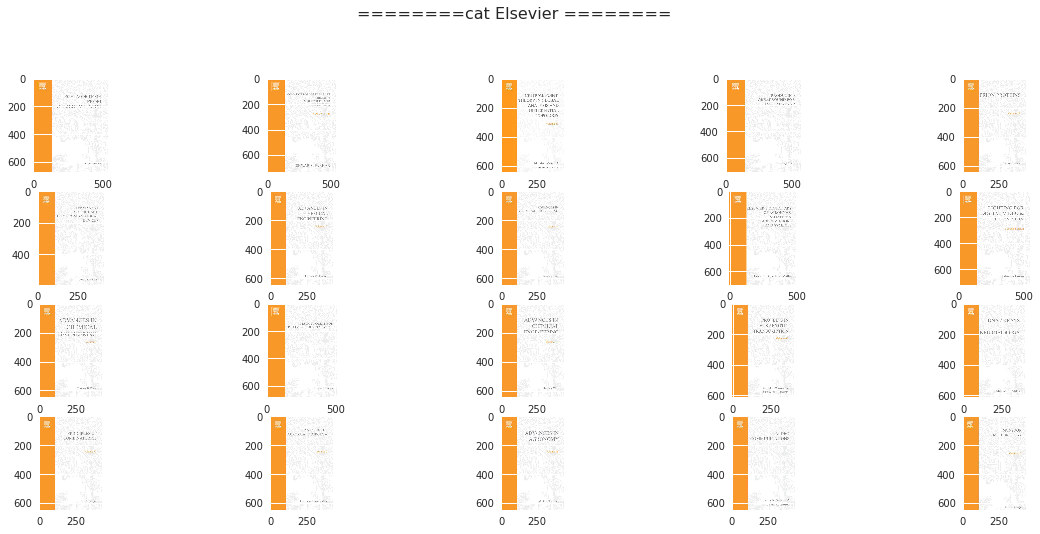

In [6]:
images_subset_plot(df_categ,'Elsevier',path_covers)

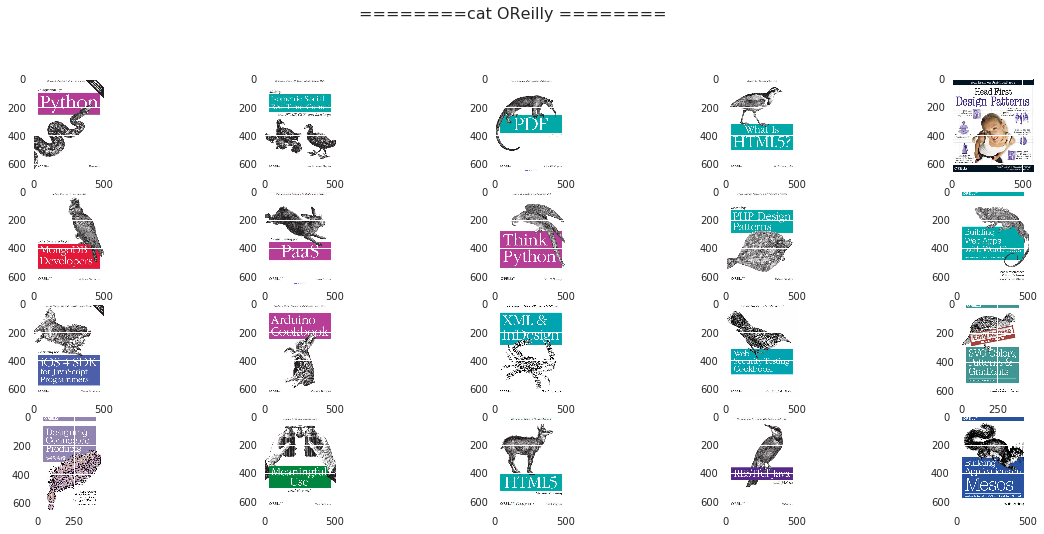

In [7]:
images_subset_plot(df_categ,'OReilly',path_covers)

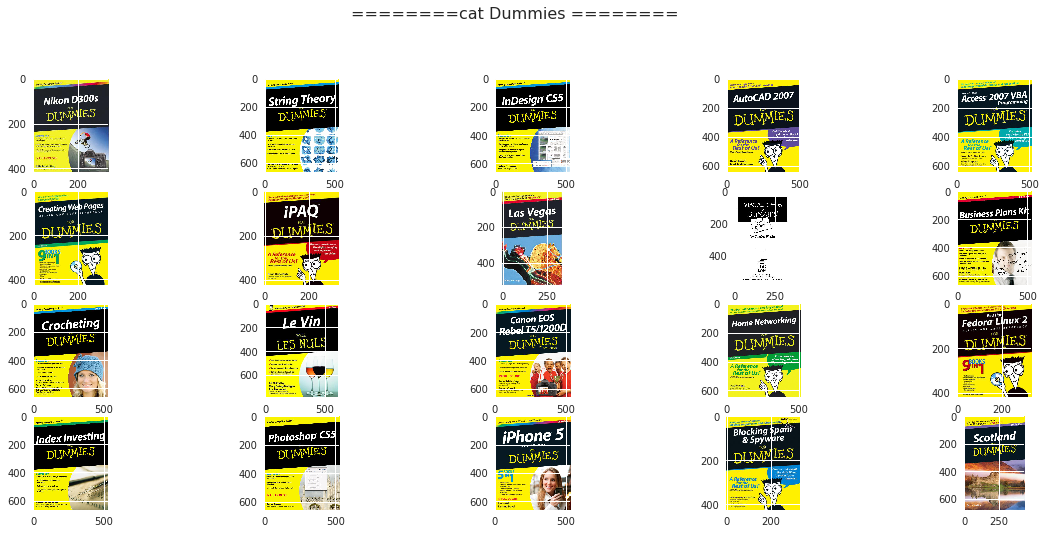

In [8]:
images_subset_plot(df_categ,'Dummies',path_covers)

In [12]:
df = pd.merge(df, df_categ, on=['name'], how='outer').fillna('autre')

In [13]:
df.categ.unique()

array(['Pack publishing', 'autre', 'Ebooks libres et gratuits', 'Dummies',
       'Springer', 'Wrox', 'Bookboon', 'Eyewitness travel', 'Apress',
       'Manning', 'The Pragmatic Programmers', 'Elsevier', 'Thomson',
       'OReilly', 'The Complete Reference', 'Ebook kaki', 'IBM Redbooks',
       'DeMYSTiFieD', 'Missing manual', 'Team LIB', 'Sams',
       'Game Development Series', 'Macmillan', 'Frommers', 'Sitepoint',
       'Premier Reference Source', 'Syngress', 'Wiley', 'Hacking exposed',
       'Technology in action', 'Oxford', 'Mhest', 'Dunod',
       "The complet idiot's guide", "Developper's library", 'JavaOne',
       'Eyrolles', 'Visual Quickstart Guide', 'Cambridge', 'Schaums',
       'Bible', 'Microsoft', "Absolute Beginner's guide", 'HaperCollins',
       'Profile publications', 'No starch Press', 'Hacker Highschool',
       'Oracle Press', 'Eni', 'CRC Press'], dtype=object)

In [14]:
df.groupby('categ').name.nunique()

categ
Absolute Beginner's guide        4
Apress                        1149
Bible                           67
Bookboon                       277
CRC Press                        6
Cambridge                       23
DeMYSTiFieD                    115
Developper's library            58
Dummies                       1225
Dunod                           47
Ebook kaki                     249
Ebooks libres et gratuits     1694
Elsevier                        28
Eni                              5
Eyewitness travel              165
Eyrolles                        56
Frommers                        22
Game Development Series         22
Hacker Highschool               14
Hacking exposed                 16
HaperCollins                    25
IBM Redbooks                    18
JavaOne                         15
Macmillan                       56
Manning                        320
Mhest                           20
Microsoft                       68
Missing manual                  85
No starch Pres

In [15]:
cat = df.groupby('categ').filter(lambda x: len(x)>100)
cat.categ.unique()

array(['Pack publishing', 'autre', 'Ebooks libres et gratuits', 'Dummies',
       'Springer', 'Wrox', 'Bookboon', 'Eyewitness travel', 'Apress',
       'Manning', 'The Pragmatic Programmers', 'OReilly', 'Ebook kaki',
       'DeMYSTiFieD', 'Sams', 'Syngress'], dtype=object)

In [16]:
def make_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [17]:
if os.path.isdir(path_splitted):
    rmtree(path_splitted, ignore_errors=True)
    
#traiter les catégories avec au moins 100 échantillons    
for d in cat.categ.unique():
    make_dir(path_splitted + d)
    
    #if d == 'autre':
    if df[df.categ == d].name.nunique() > 1000:
        dfx = df[df.categ == d].name.sample(1000)
    else: 
        dfx = df[df.categ == d].name

    for f in dfx:
        pf = path+'COVER_JPEG/'+f
        if os.path.isfile(pf): 
            copyfile(pf, path_splitted+d+"/"+f)
        else:
            print(f'{pf} absent, categorie {d}')
        

../data/covers/COVER_JPEG/04CF06FC44586FADB4C052C74636D473 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/0B5ABA49F232DDFF1DCC69CB76415337 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/20AF0AA8562ACE9EAC3FD2A131024026 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/25E1BAB170D774B6BB197DBED9F57510 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/4C1F18FD39E5EE3F50AC2735CDD7BE74 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/586B123DC17CD71D47A0BAC9F72D3DB9 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/8854EC1168771EA1E421DE8C736A8960 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/8B85C0EB5B7B8B956693876D7B4C3187 - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/9DB0F16D8FA866A773294AFF5BF20A2B - Copie.jpg absent, categorie Sams
../data/covers/COVER_JPEG/A7C254F19DC8345CBFE5E5421466D95C - Copie.jpg absent, categorie Sams
